In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [3]:
#read the data
df=pd.read_csv('../data/insurance_data.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_33332\792591838.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/insurance_data.csv')


In [4]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,3/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,5/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,7/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,5/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,7/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [27]:
# Function to calculate variability
def calculate_variability(df, columns):
    stats = {}
    for column in columns:
        values = df[column]
        stats[column] = {
            "Range": values.max() - values.min(),
            "Variance": values.var(),
            "Standard Deviation": values.std(),
            "IQR": values.quantile(0.75) - values.quantile(0.25),
            "Coefficient of Variation": (values.std() / values.mean()) if values.mean() != 0 else None,
        }
    return pd.DataFrame(stats)

# Specify numerical features
numerical_features = ["TotalPremium", "TotalClaims"]

# Calculate and display variability
variability_stats = calculate_variability(df, numerical_features)
print(variability_stats)


                          TotalPremium   TotalClaims
Range                     66065.180174  4.050945e+05
Variance                  53030.956814  5.683812e+06
Standard Deviation          230.284513  2.384075e+03
IQR                          21.929825  0.000000e+00
Coefficient of Variation      3.719936  3.675657e+01


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [30]:
#data types of the data
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [32]:
# Convert StartDate to datetime
if df['TransactionMonth'].dtype != 'datetime64[ns]':
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# # Check categorical variables
# if df['PolicyID'].dtype == 'object':
#     df['PolicyType'] = df['PolicyType'].astype('category')

# print("\nUpdated Data Types:")
# print(df.dtypes)

# Summary
print("\nUnique Values in Categorical Columns:")
for column in df.select_dtypes(include=['category', 'object']):
    print(f"{column}: {df[column].unique()}")



Unique Values in Categorical Columns:
Citizenship: ['  ' 'AF' 'ZA' 'ZW']
LegalType: ['Close Corporation' 'Individual' 'Partnership' 'Private company'
 'Public company' 'Sole proprieter']
Title: ['Mr' 'Dr' 'Miss' 'Mrs' 'Ms']
Language: ['English']
Bank: ['First National Bank' 'Standard Bank' nan 'ABSA Bank' 'Capitec Bank'
 'Nedbank' 'FirstRand Bank' 'Investec Bank' 'Ithala Bank' 'Old Mutual'
 'Mercantile Lisbon Bank' 'RMB Private Bank']
AccountType: ['Current account' 'Savings account' nan 'Transmission account']
MaritalStatus: ['Not specified' 'Married' 'Single' nan]
Gender: ['Not specified' 'Male' 'Female' nan]
Country: ['South Africa']
Province: ['Gauteng' 'KwaZulu-Natal' 'Mpumalanga' 'Eastern Cape' 'Western Cape'
 'Limpopo' 'North West' 'Free State' 'Northern Cape']
MainCrestaZone: ['Rand East' 'Transvaal (all except Pretoria)' 'Johannesburg'
 'Natal (Durban)' 'Tembu 2, Cape Mid 2, Cape Mid West, Tembu 1'
 'Transvaal (Pretoria)' 'Natal' 'Cape Province (Cape Town)'
 'Langkloof, Coast

In [33]:
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [34]:
missing_percentage = df[['Bank', 'AccountType', 'MaritalStatus', 'Gender','mmcode','VehicleType','make','Model','Cylinders','cubiccapacity']].isnull().mean() * 100
print("Percentage of Missing Values:")
print(missing_percentage)

Percentage of Missing Values:
Bank             14.594670
AccountType       4.022806
MaritalStatus     0.825819
Gender            0.953507
mmcode            0.055195
VehicleType       0.055195
make              0.055195
Model             0.055195
Cylinders         0.055195
cubiccapacity     0.055195
dtype: float64


In [37]:
df['Gender'].fillna('Unknown', inplace=True)
df['MaritalStatus'].fillna('Unknown', inplace=True)


In [42]:
for col in ['Bank', 'AccountType','mmcode','VehicleType','make','Model','Cylinders','cubiccapacity']:
    df[col].fillna(df[col].mode()[0], inplace=True)


c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


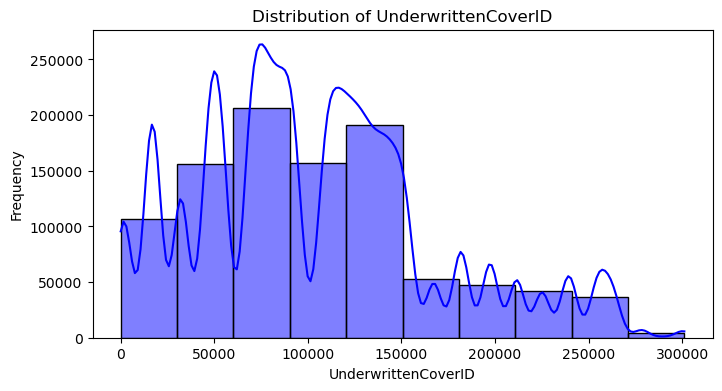

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


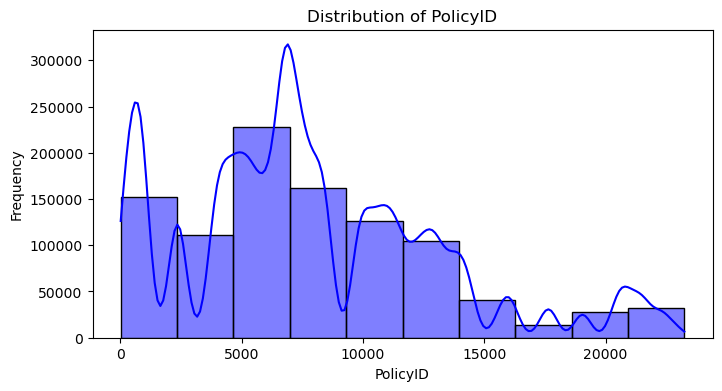

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


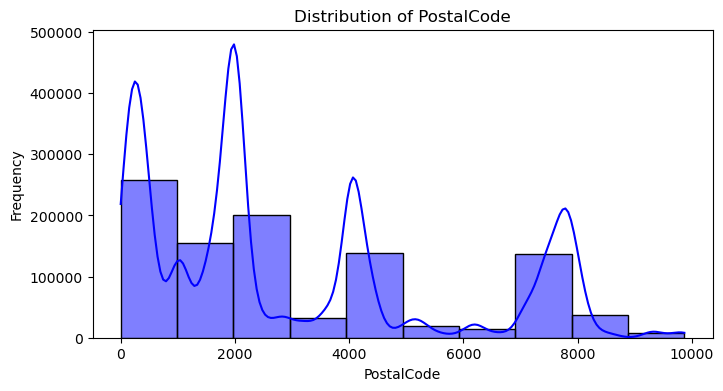

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


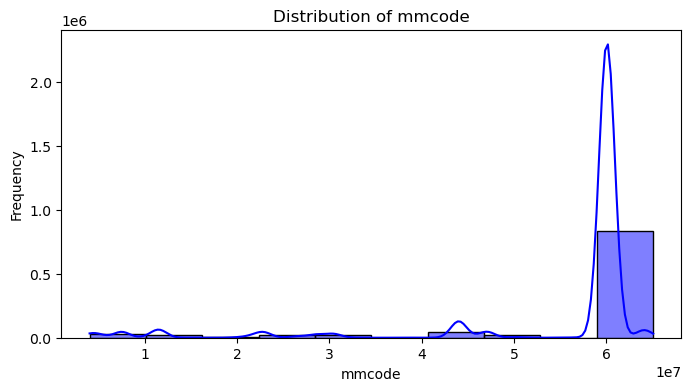

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


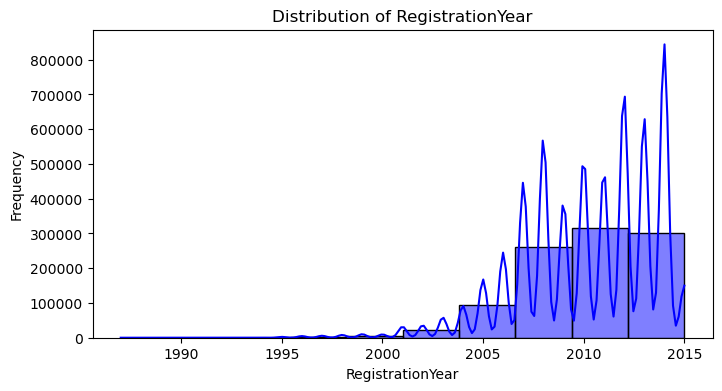

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


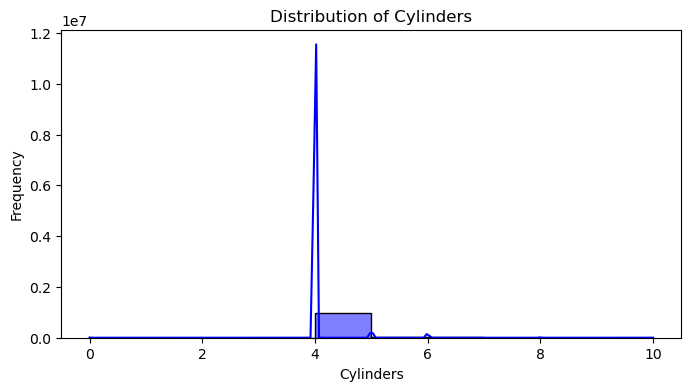

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


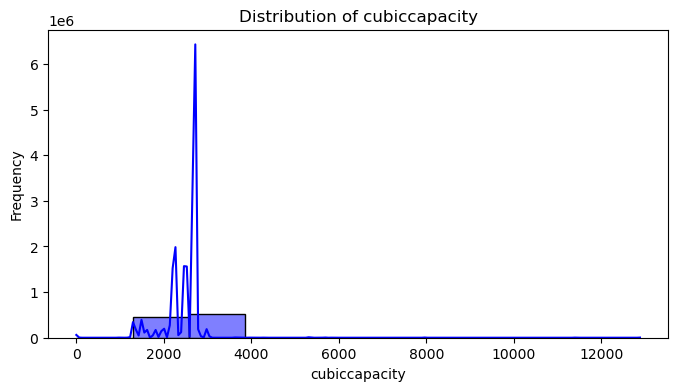

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


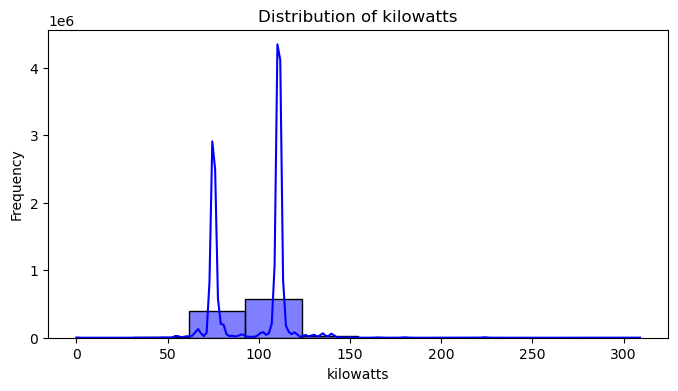

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


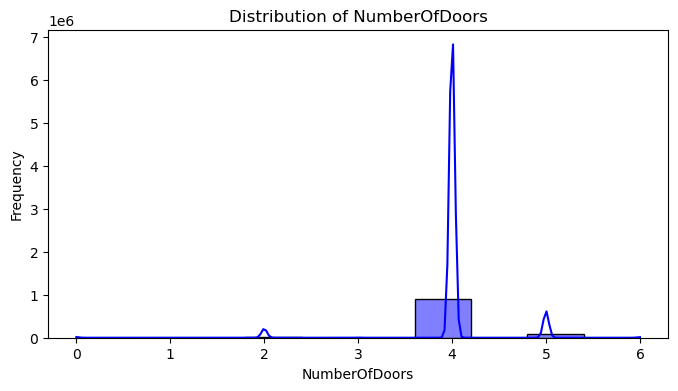

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


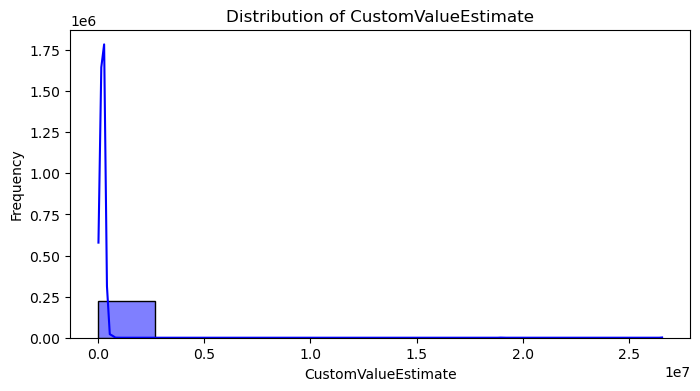

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


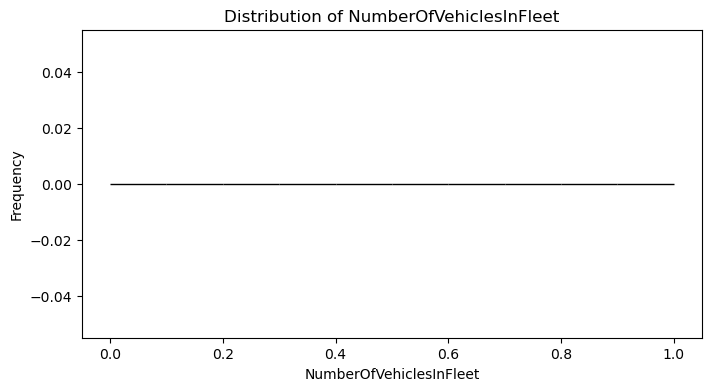

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


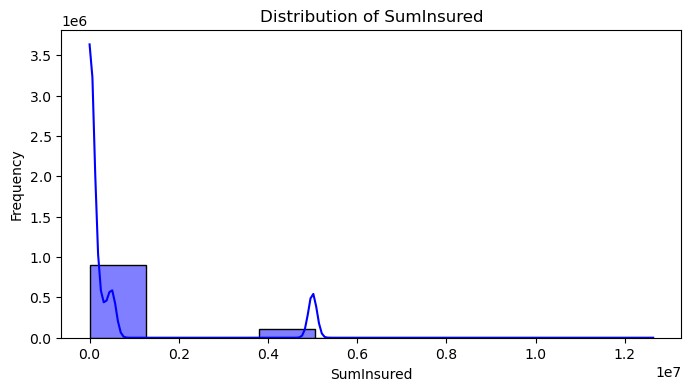

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


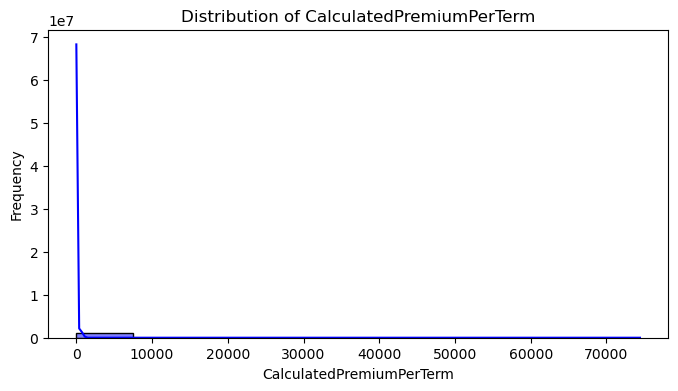

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


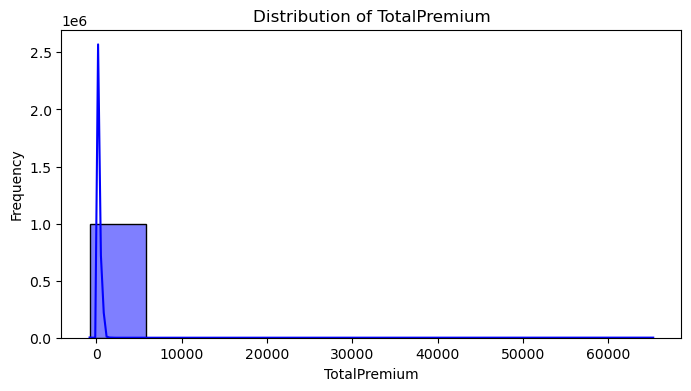

c:\Users\zeyneb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


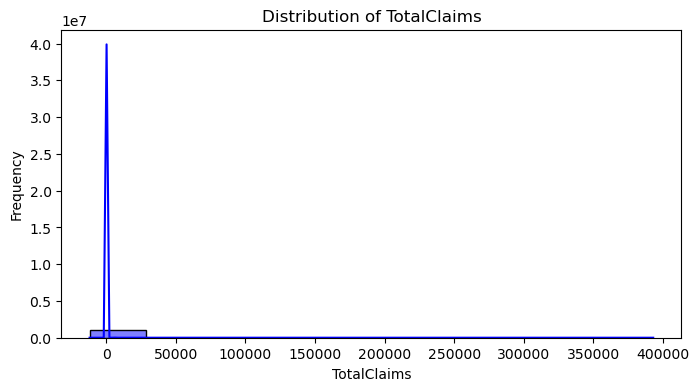

In [44]:
# Plot histograms for numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=10, color="blue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


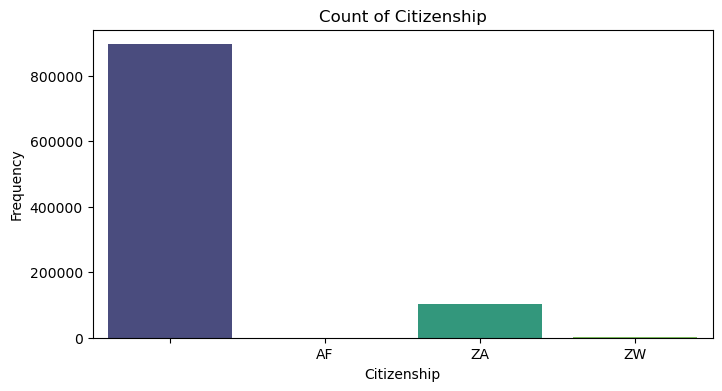

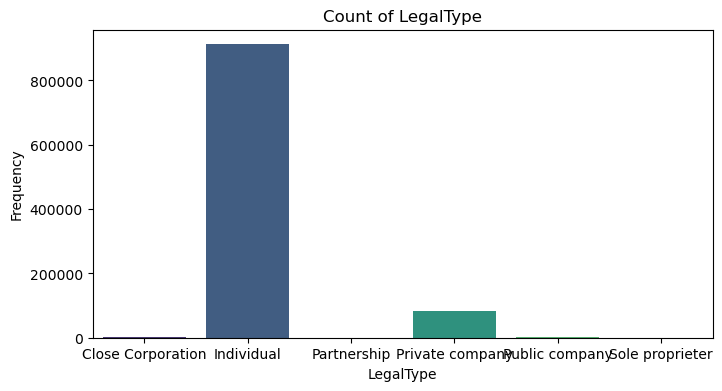

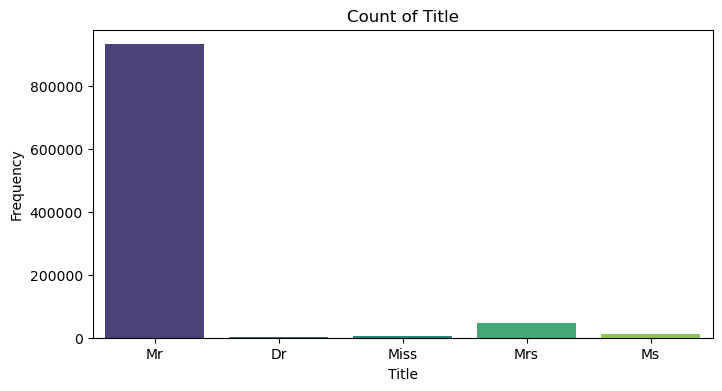

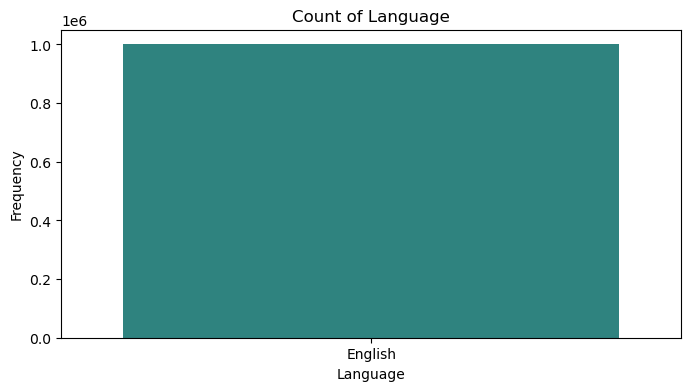

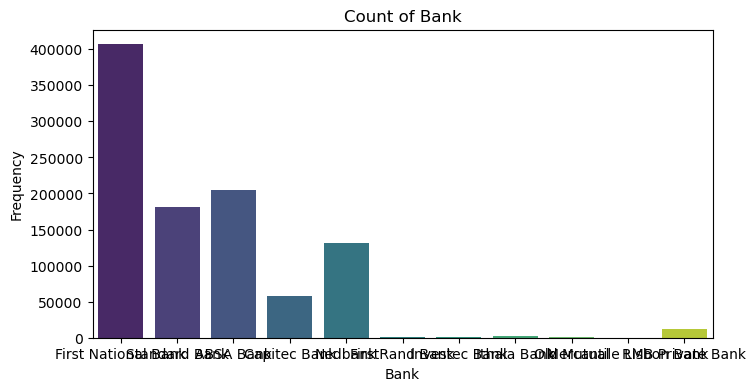

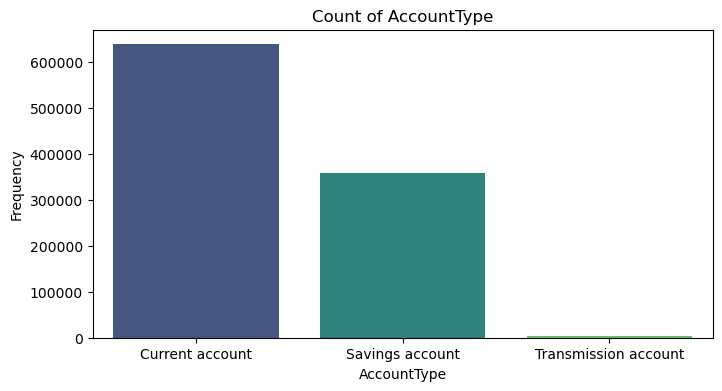

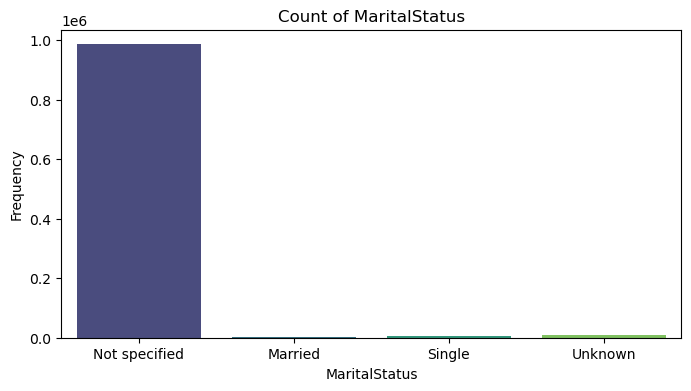

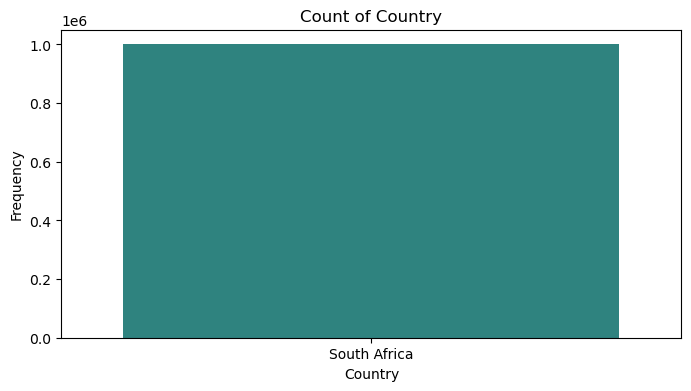

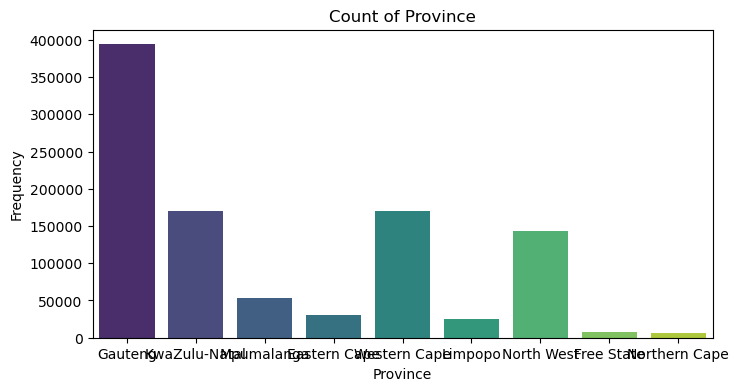

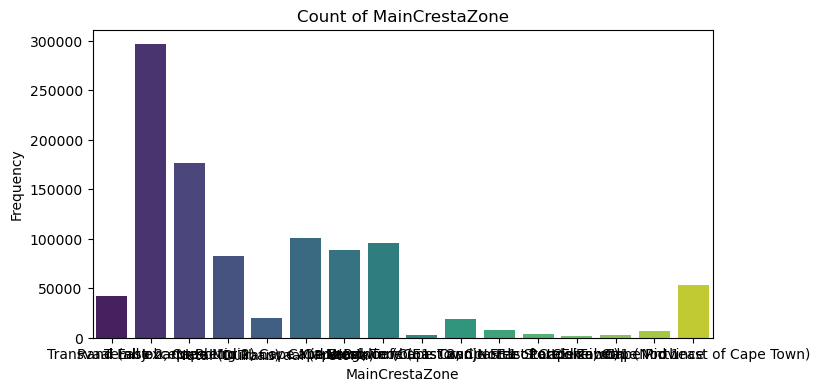

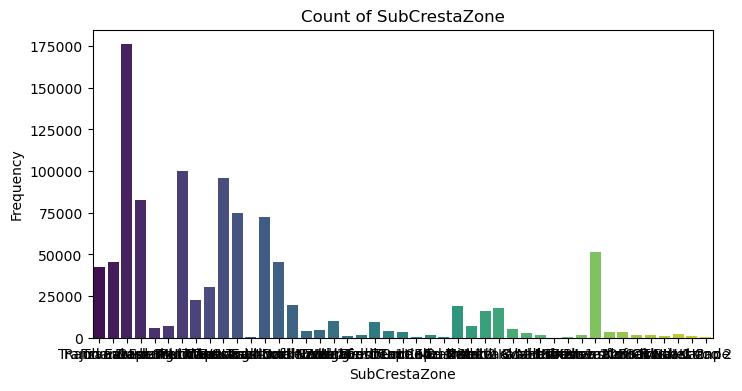

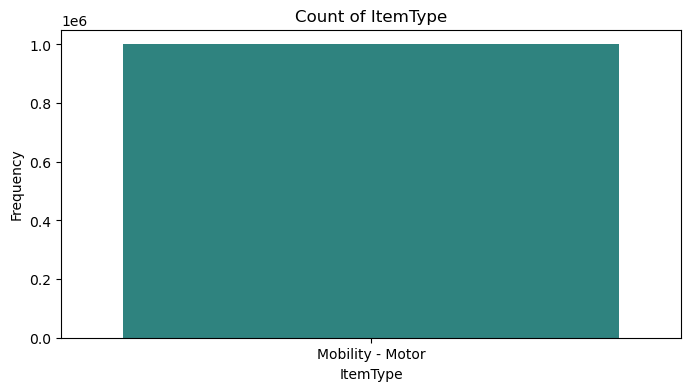

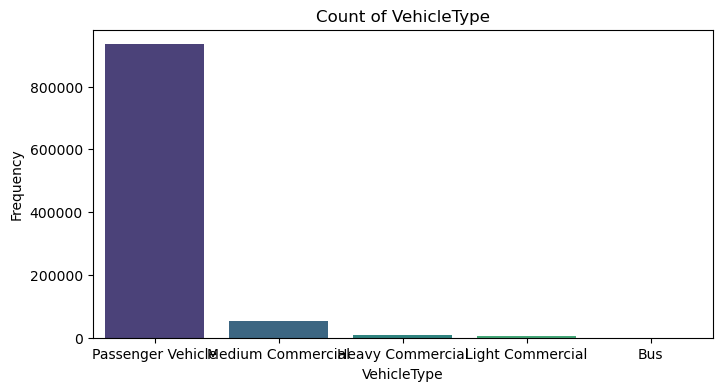

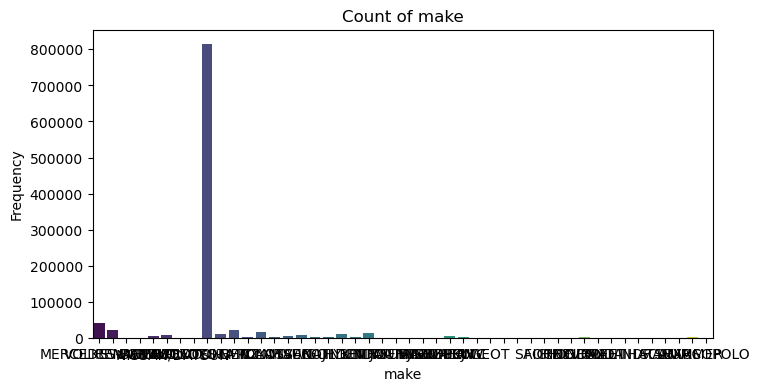

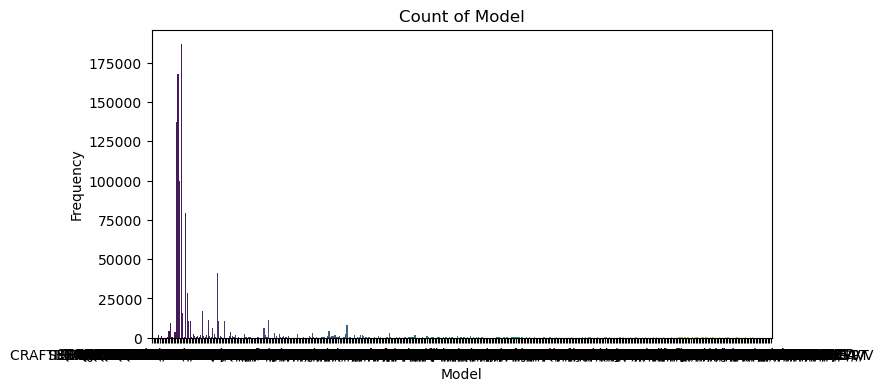

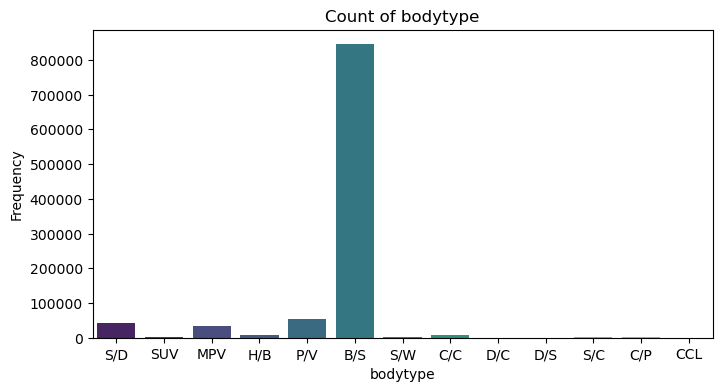

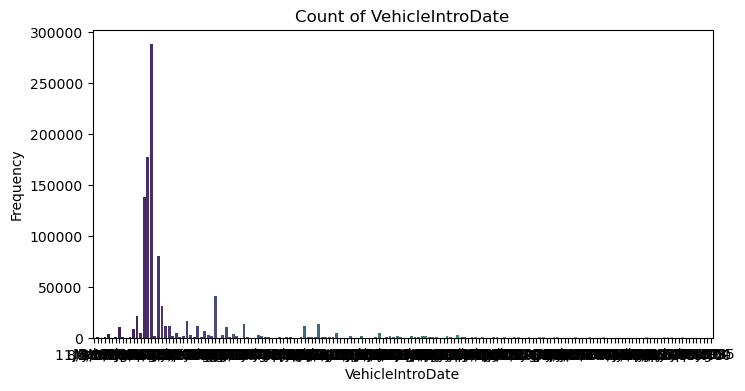

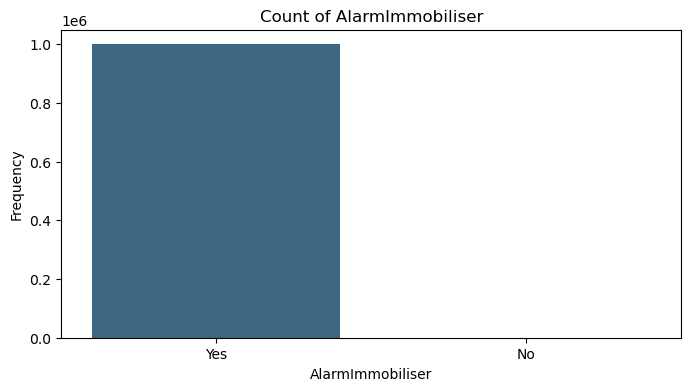

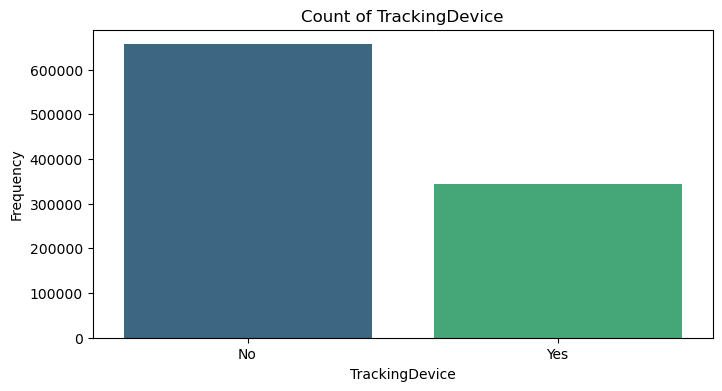

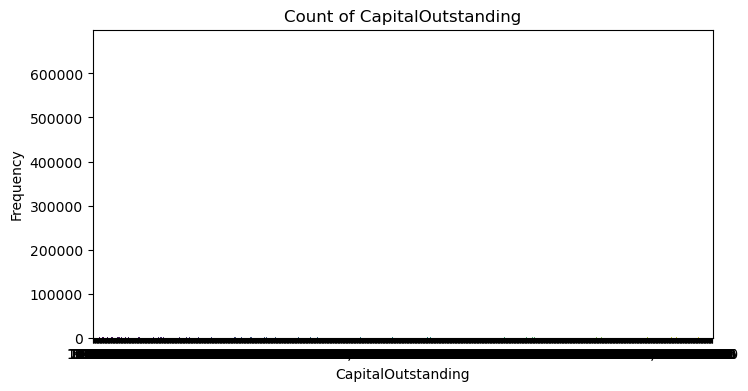

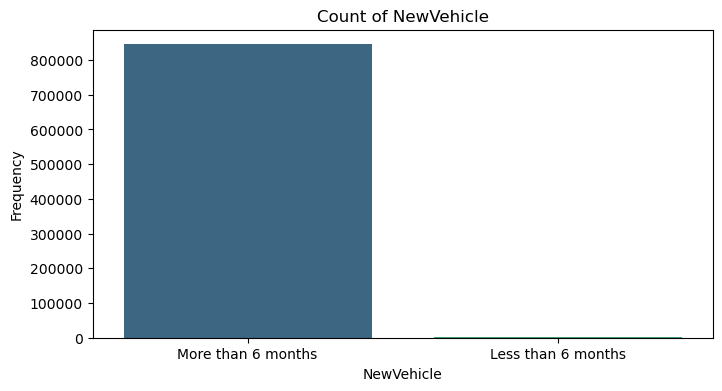

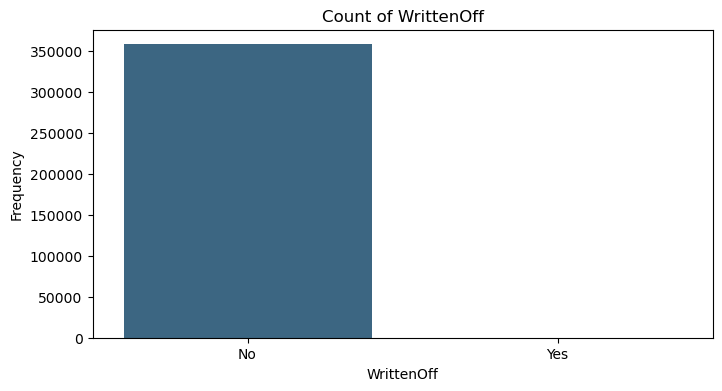

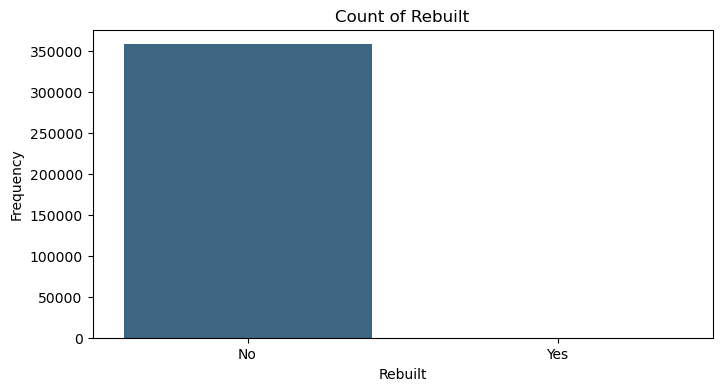

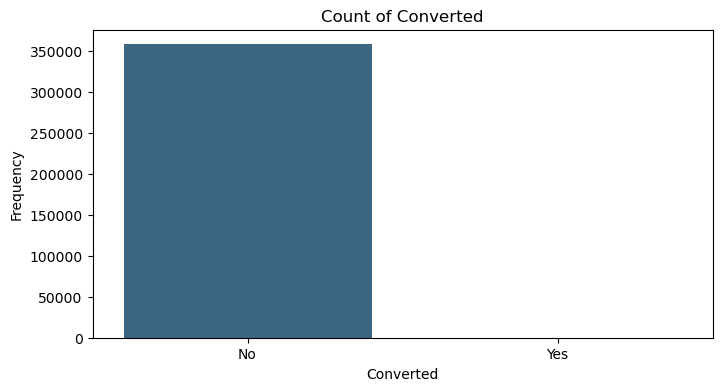

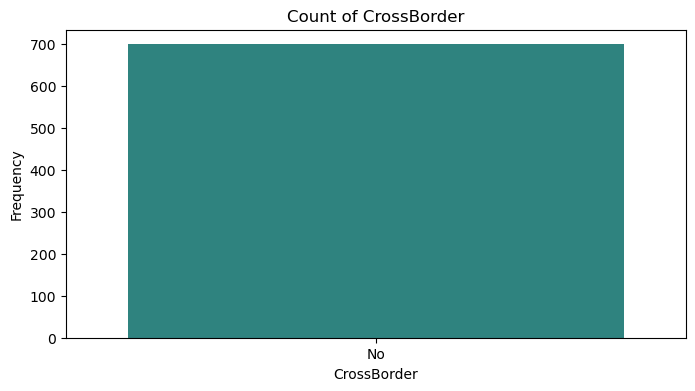

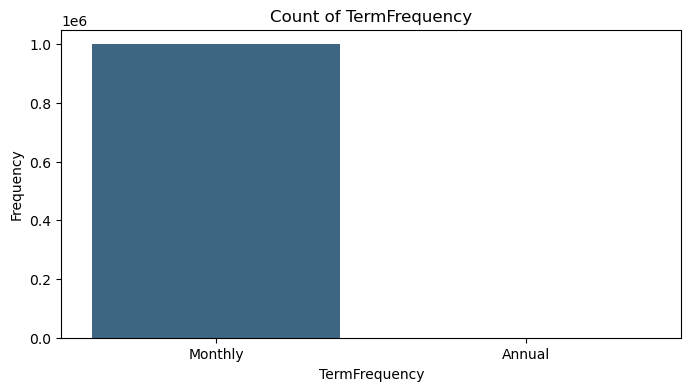

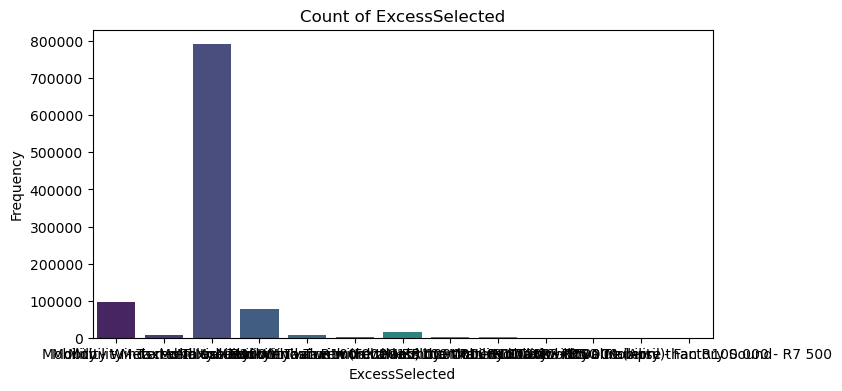

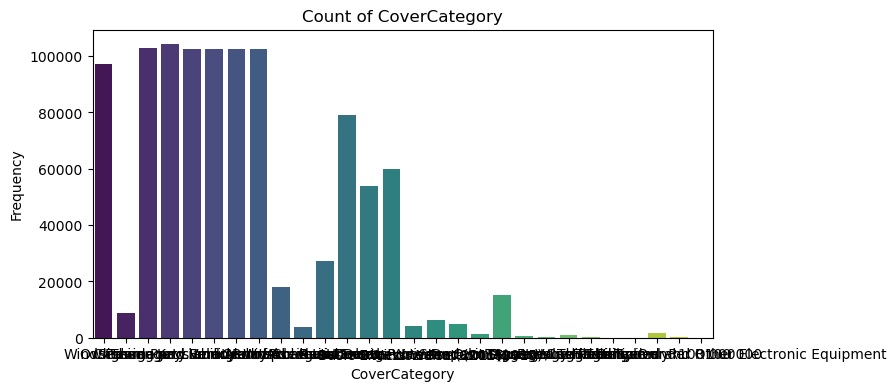

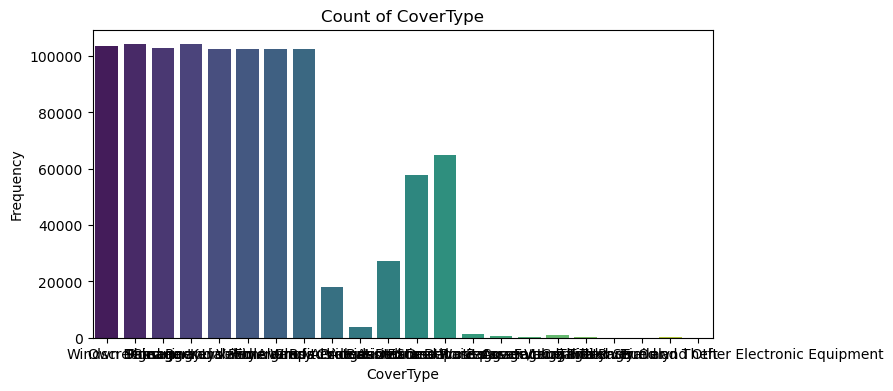

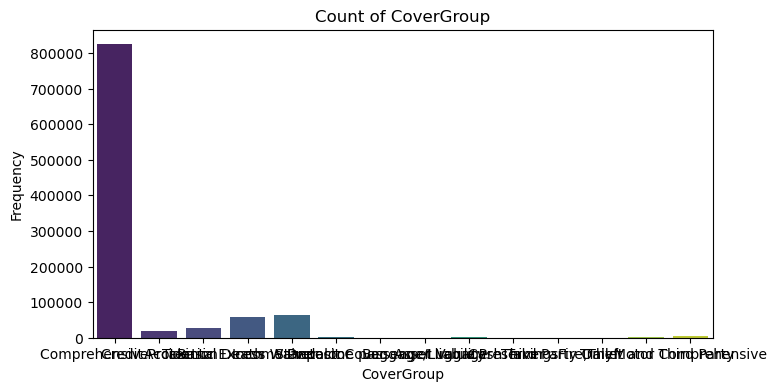

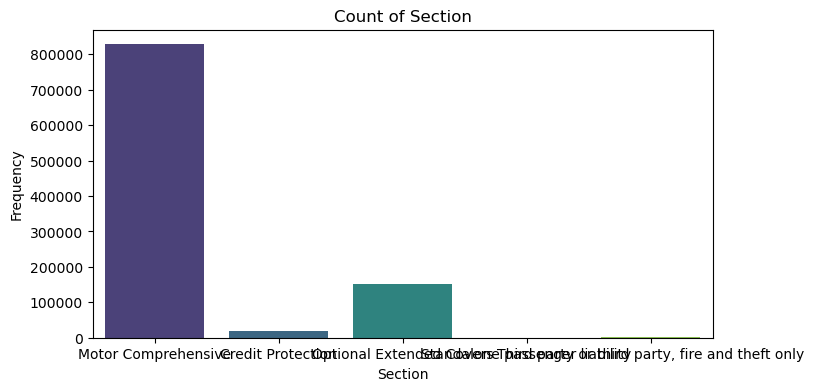

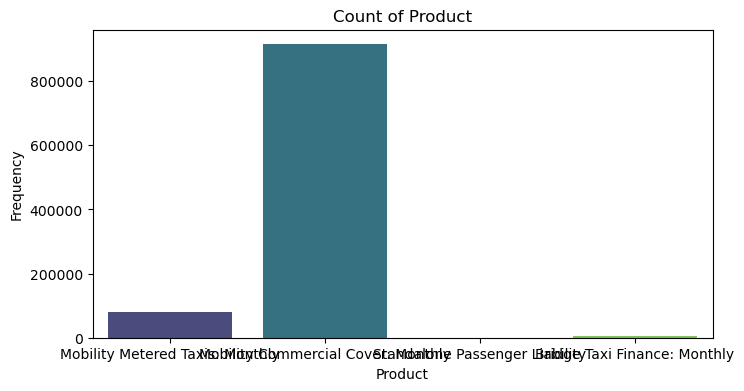

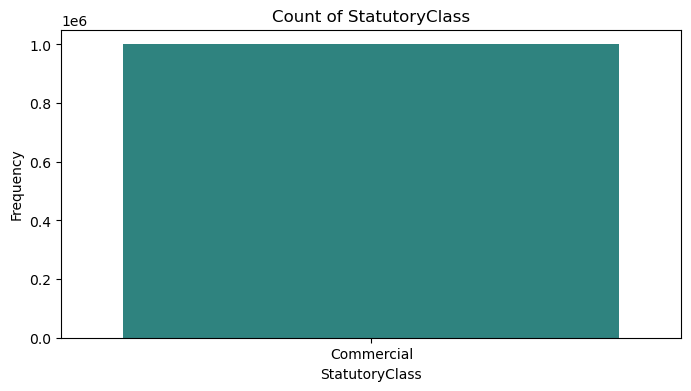

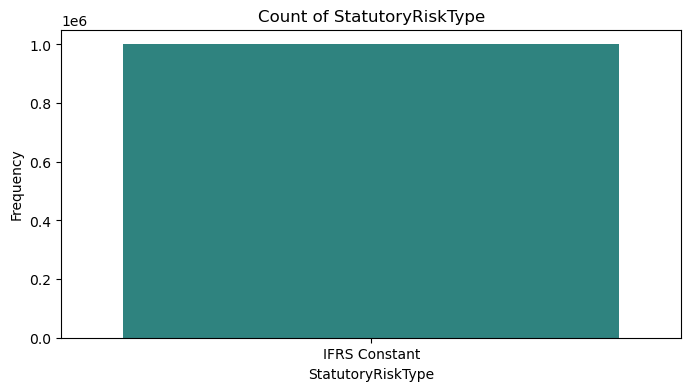

In [45]:
# Plot bar charts for categorical columns
categorical_columns = df.select_dtypes(include=["object", "category"]).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column, palette="viridis")
    plt.title(f"Count of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


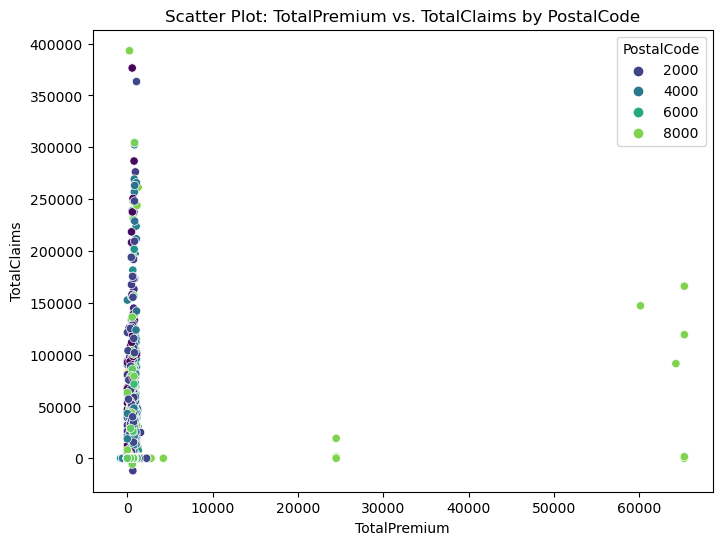

In [ ]:
##Scatter Plot: TotalPremium vs. TotalClaims 

# Scatter plot of TotalPremium vs. TotalClaims, colored by PostalCode
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="TotalPremium", y="TotalClaims", hue="PostalCode", palette="viridis")
plt.title("Scatter Plot: TotalPremium vs. TotalClaims by PostalCode")
plt.xlabel("TotalPremium")
plt.ylabel("TotalClaims")
plt.legend(title="PostalCode")
plt.show()


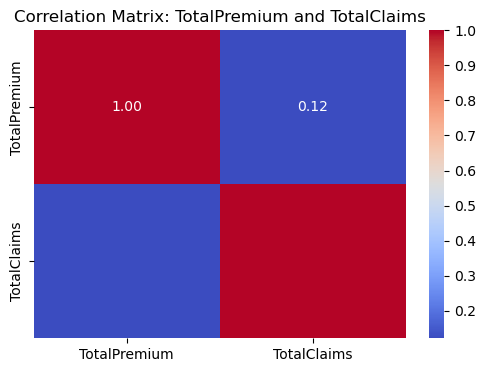

In [49]:
##correlition Matrix
correlation_matrix = df[["TotalPremium", "TotalClaims"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix: TotalPremium and TotalClaims")
plt.show()


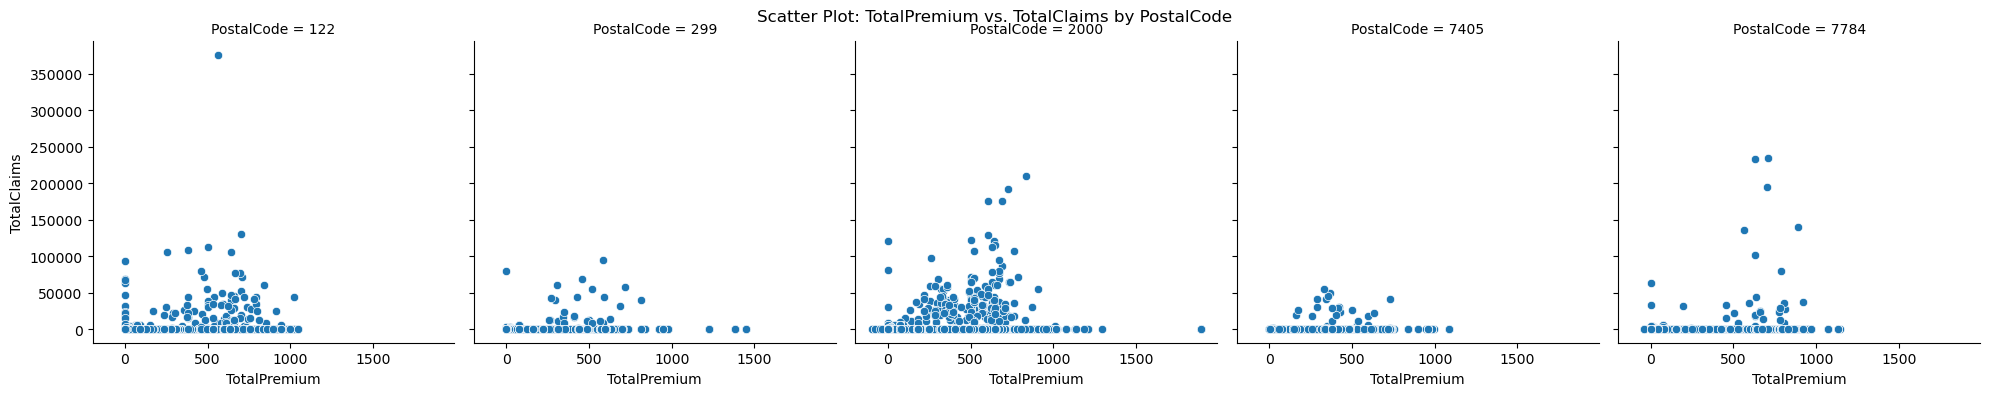

In [51]:
##Analyzing Relationships by PostalCode

# Limit the dataset to the top 5 most frequent PostalCodes
top_postal_codes = df['PostalCode'].value_counts().head(5).index
df_subset = df[df['PostalCode'].isin(top_postal_codes)]

# Scatter plot with FacetGrid, for only the top 5 PostalCodes
g = sns.FacetGrid(df_subset, col="PostalCode", height=4, aspect=1)
g.map(sns.scatterplot, "TotalPremium", "TotalClaims")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Scatter Plot: TotalPremium vs. TotalClaims by PostalCode")
plt.show()



In [5]:
# Example of grouping by PostalCode
geo_summary = df.groupby("PostalCode").agg({
    "TotalPremium": ["mean", "median", "sum"],
    "TotalClaims": ["mean", "median", "sum"],
    "CoverType": "nunique",  # Number of unique cover types
    "make": "nunique"        # Number of unique auto makes
}).reset_index()

geo_summary.columns = ['PostalCode', 
                       'AvgTotalPremium', 'MedianTotalPremium', 'TotalPremiumSum',
                       'AvgTotalClaims', 'MedianTotalClaims', 'TotalClaimsSum',
                       'UniqueCoverTypes', 'UniqueAutoMakes']

print(geo_summary.head())


   PostalCode  AvgTotalPremium  MedianTotalPremium  TotalPremiumSum  \
0           1        51.120638            1.611404    273035.326593   
1           2        40.901700            0.000000     60861.729134   
2           4       113.947737            8.458647      8773.975714   
3           5        61.653626            3.448333     24661.450525   
4           6        50.591432            0.961491     22260.230088   

   AvgTotalClaims  MedianTotalClaims  TotalClaimsSum  UniqueCoverTypes  \
0       57.589092                0.0   307583.342126                14   
1       41.589582                0.0    61885.298243                11   
2        0.000000                0.0        0.000000                11   
3      207.378816                0.0    82951.526310                10   
4       19.610447                0.0     8628.596491                10   

   UniqueAutoMakes  
0                5  
1                3  
2                1  
3                1  
4                2  


C:\Users\hp\AppData\Local\Temp\ipykernel_33332\2550684298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_summary, x="PostalCode", y="AvgTotalPremium", palette="viridis")


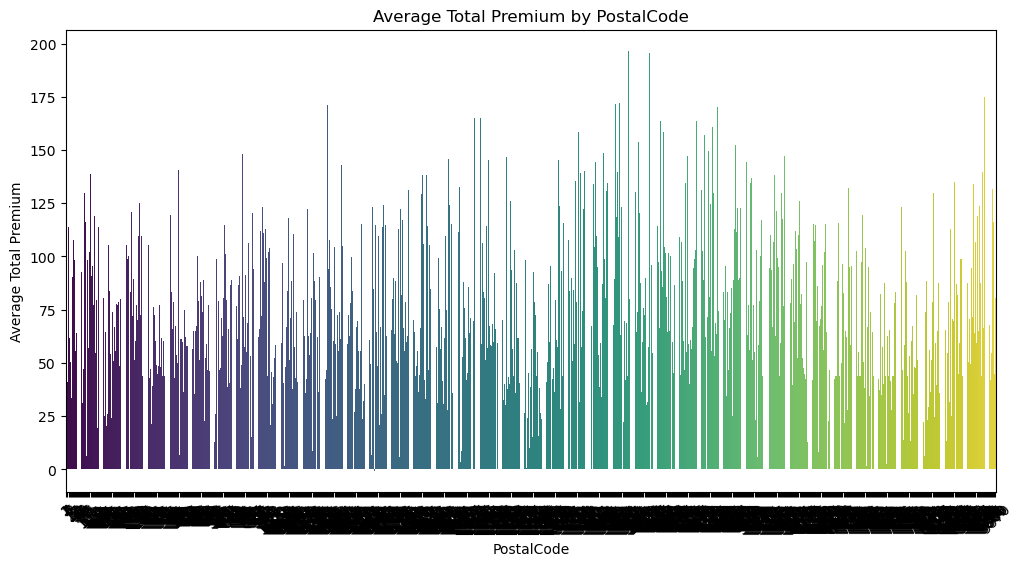

C:\Users\hp\AppData\Local\Temp\ipykernel_33332\2550684298.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_summary, x="PostalCode", y="AvgTotalClaims", palette="plasma")


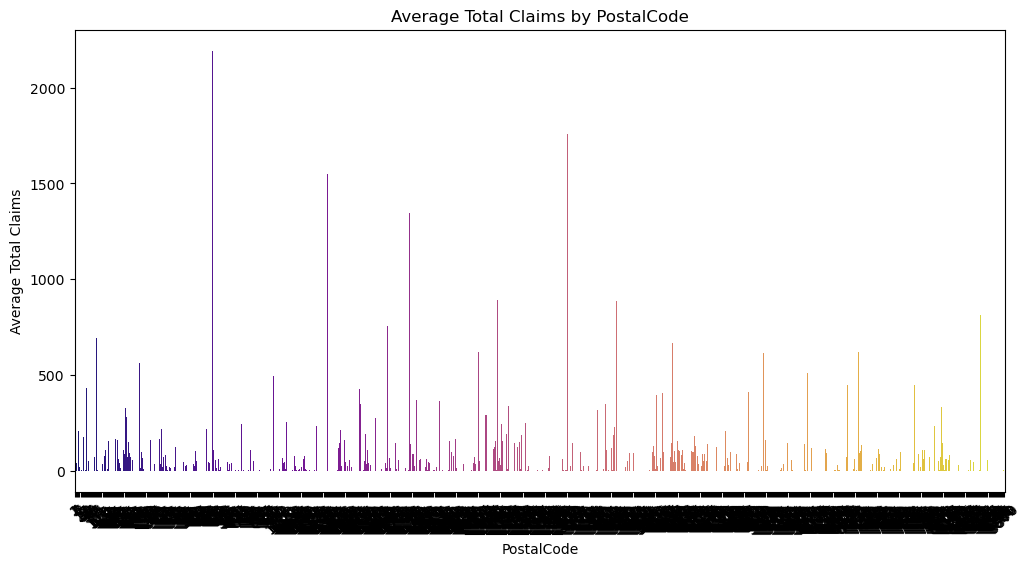

In [6]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Bar plot for Average Total Premium by PostalCode
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_summary, x="PostalCode", y="AvgTotalPremium", palette="viridis")
plt.title("Average Total Premium by PostalCode")
plt.xlabel("PostalCode")
plt.ylabel("Average Total Premium")
plt.xticks(rotation=45)
plt.show()

# Bar plot for Average Total Claims by PostalCode
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_summary, x="PostalCode", y="AvgTotalClaims", palette="plasma")
plt.title("Average Total Claims by PostalCode")
plt.xlabel("PostalCode")
plt.ylabel("Average Total Claims")
plt.xticks(rotation=45)
plt.show()


c:\Users\hp\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


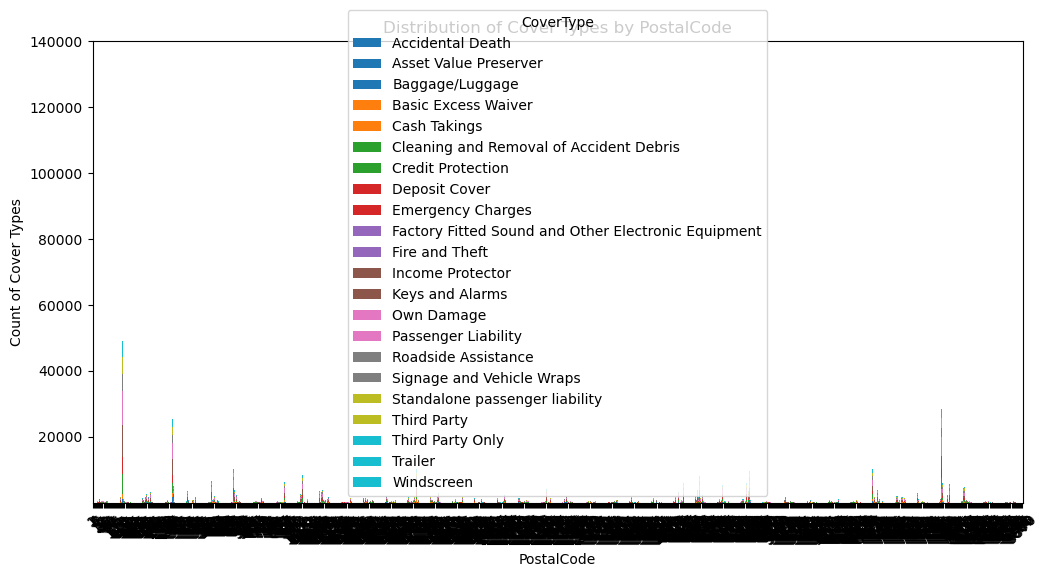

In [7]:
# Pivot table for CoverType distribution
cover_dist = df.pivot_table(index="PostalCode", columns="CoverType", aggfunc="size", fill_value=0)

# Stacked bar plot for CoverType distribution
cover_dist.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Distribution of Cover Types by PostalCode")
plt.xlabel("PostalCode")
plt.ylabel("Count of Cover Types")
plt.legend(title="CoverType")
plt.xticks(rotation=45)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_33332\2195803513.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_summary, x="PostalCode", y="UniqueAutoMakes", palette="coolwarm")


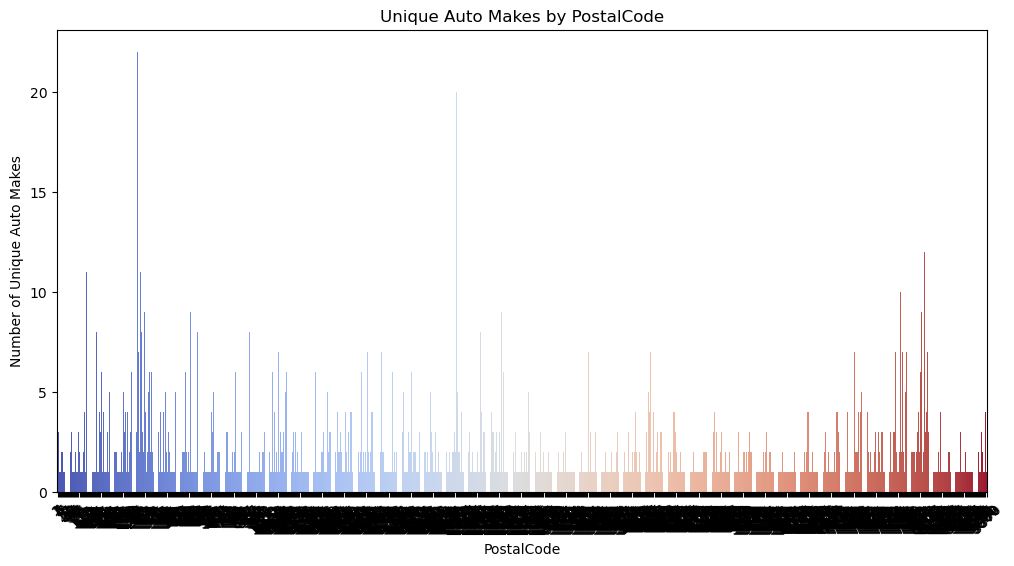

In [8]:
# Bar plot for Unique Auto Makes by PostalCode
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_summary, x="PostalCode", y="UniqueAutoMakes", palette="coolwarm")
plt.title("Unique Auto Makes by PostalCode")
plt.xlabel("PostalCode")
plt.ylabel("Number of Unique Auto Makes")
plt.xticks(rotation=45)
plt.show()


In [9]:
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [10]:
# Summarize by PostalCode
postal_summary = df.groupby("PostalCode").agg({"TotalPremium": "mean", "TotalClaims": "mean"}).reset_index()

# Summarize by Province
province_summary = df.groupby("Province").agg({"TotalPremium": "mean", "TotalClaims": "mean"}).reset_index()

# Summarize by Country
country_summary = df.groupby("Country").agg({"TotalPremium": "mean", "TotalClaims": "mean"}).reset_index()


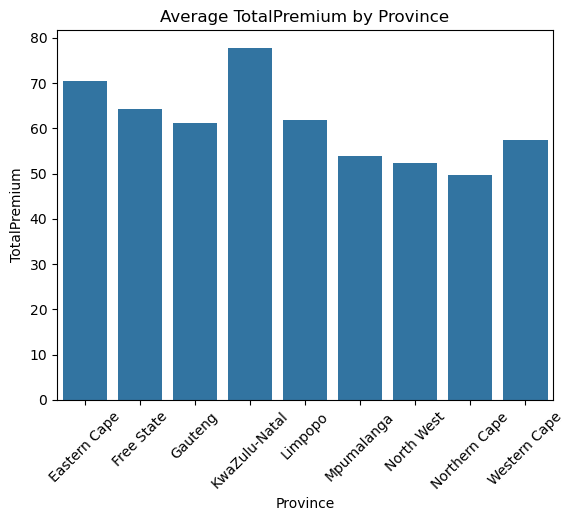

In [11]:
# Example: Bar plot for Province
sns.barplot(data=province_summary, x="Province", y="TotalPremium")
plt.title("Average TotalPremium by Province")
plt.xticks(rotation=45)
plt.show()


In [12]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=["number"]).columns
print("Numerical Columns:", numerical_columns)


Numerical Columns: Index(['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode',
       'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
       'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet',
       'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


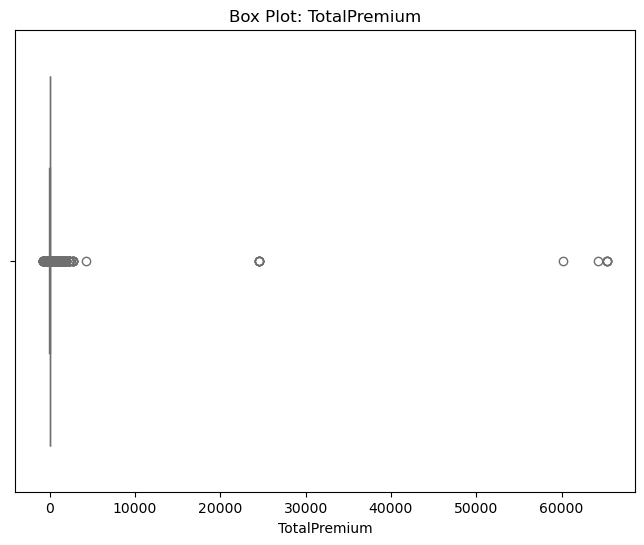

In [13]:

# Box plot for TotalPremium
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="TotalPremium", color="skyblue")
plt.title("Box Plot: TotalPremium")
plt.xlabel("TotalPremium")
plt.show()


In [15]:
# Function to detect outliers based on IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Example for TotalPremium
outliers, lower, upper = detect_outliers(df, "TotalPremium")
print(f"Outliers in TotalPremium: {outliers.shape[0]}")
print(f"Lower Bound: {lower}, Upper Bound: {upper}")


Outliers in TotalPremium: 209042
Lower Bound: -32.89473684, Upper Bound: 54.8245614


In [16]:
df_cleaned = df[(df["TotalPremium"] >= lower) & (df["TotalPremium"] <= upper)]


In [17]:
df["Log_TotalPremium"] = np.log1p(df["TotalPremium"])

c:\Users\hp\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
pip install dvc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/599.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/599.0 kB ? eta -:--:--
   ----------------------------------- ---- 524.3/599.0 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 599.0/599.0 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 442.1 kB/s eta 0:00:02
   ------------------------ --------------- 0.8/1.3 MB 621.9 kB/s eta 0:00:01
   -------------------------------- ------- 1.0/1.3 MB 719.5 kB/s eta 0:00:01
   -------------------------------- ------- 1.0/1.3 MB 719.5 kB/s eta 0:00:01
   -----